<a href="https://colab.research.google.com/github/NagarajaN-Nethi/Chest-Xray-COVID-19/blob/master/Covid_19_Chest_X_Ray.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q kaggle

In [114]:
#from google.colab import files
#files.upload()

In [3]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d tawsifurrahman/covid19-radiography-database

 99% 1.14G/1.15G [00:43<00:00, 31.4MB/s]
100% 1.15G/1.15G [00:44<00:00, 28.0MB/s]


In [ ]:
!mkdir data
!unzip covid19-radiography-database.zip -d data

In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Sequential, Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg19 import VGG19
import warnings
from glob import glob
warnings.filterwarnings('ignore')
print(tf.__version__)

2.3.0


In [143]:
!mkdir /tmp/Xray_train_data

In [144]:
!cp -R "/content/data/COVID-19 Radiography Database/COVID-19" "/tmp/Xray_train_data"

In [145]:
!cp -R "/content/data/COVID-19 Radiography Database/NORMAL" "/tmp/Xray_train_data"

In [146]:
#!cp -R "/content/data/COVID-19 Radiography Database/Viral Pneumonia" "/tmp/Xray_train_data"

In [147]:
!ls "/tmp/Xray_train_data"

COVID-19  NORMAL


In [148]:
!ls -1 "/tmp/Xray_train_data/COVID-19"| wc -l 

219


In [149]:
!ls -1 "/tmp/Xray_train_data/NORMAL"| wc -l 

1341


In [150]:
!find "/tmp/Xray_train_data/NORMAL" -type f -print0 | sort -zR | tail -zn +220 | xargs -0 rm

In [151]:
!ls -1 "/tmp/Xray_train_data/NORMAL"| wc -l 

219


In [152]:
train_data_dir= "/tmp/Xray_train_data"

In [153]:
image_size = [64, 64]
batch_size = 8
train_datagen = ImageDataGenerator(rescale = 1. / 255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True,
                                   vertical_flip = True,
                                   validation_split = 0.3)

In [154]:
train_generator = train_datagen.flow_from_directory(train_data_dir,
                                                    target_size = image_size,
                                                    batch_size = batch_size,
                                                    class_mode = 'binary',
                                                    subset = 'training')
validation_generator = train_datagen.flow_from_directory(train_data_dir, 
                                                        target_size = image_size,
                                                        batch_size = batch_size,
                                                        class_mode = 'binary',
                                                        subset = 'validation')

Found 308 images belonging to 2 classes.
Found 130 images belonging to 2 classes.


In [155]:
model = Sequential([
                    Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    Dropout(0.1),
                    Flatten(),
                    Dense(1, activation = 'sigmoid')                 
])

In [156]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [157]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 20)

Epoch 1/20
39/39 [==============================] - 9s 221ms/step - loss: 0.7119 - accuracy: 0.5942 - val_loss: 0.6406 - val_accuracy: 0.6769
Epoch 2/20
39/39 [==============================] - 8s 214ms/step - loss: 0.4406 - accuracy: 0.8149 - val_loss: 0.6211 - val_accuracy: 0.7385
Epoch 3/20
39/39 [==============================] - 8s 217ms/step - loss: 0.3953 - accuracy: 0.8377 - val_loss: 0.4781 - val_accuracy: 0.8154
Epoch 4/20
39/39 [==============================] - 8s 216ms/step - loss: 0.3168 - accuracy: 0.8604 - val_loss: 0.5468 - val_accuracy: 0.7769
Epoch 5/20
39/39 [==============================] - 8s 215ms/step - loss: 0.3464 - accuracy: 0.8734 - val_loss: 0.3451 - val_accuracy: 0.8615
Epoch 6/20
39/39 [==============================] - 8s 215ms/step - loss: 0.2601 - accuracy: 0.9253 - val_loss: 0.3727 - val_accuracy: 0.8846
Epoch 7/20
39/39 [==============================] - 8s 215ms/step - loss: 0.3349 - accuracy: 0.8701 - val_loss: 0.2922 - val_accuracy: 0.8769
Epoch 

In [158]:
#define plots used in the Tensorflow Professional Cerificate on Coursera
#source https://www.coursera.org/professional-certificates/tensorflow-in-practice
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

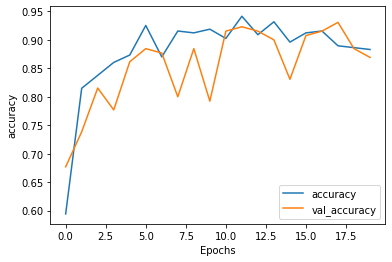

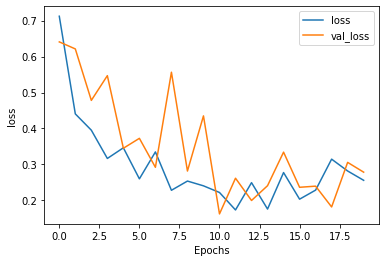

In [159]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [160]:
model = Sequential([
                    Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    BatchNormalization(),
                    Dropout(0.1),
                    Flatten(),
                    Dense(1, activation = 'sigmoid')                 
])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [52]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 20)

Epoch 1/20
39/39 [==============================] - 9s 224ms/step - loss: 1.2292 - accuracy: 0.7045 - val_loss: 1.4616 - val_accuracy: 0.5000
Epoch 2/20
39/39 [==============================] - 8s 217ms/step - loss: 0.4532 - accuracy: 0.8312 - val_loss: 1.2345 - val_accuracy: 0.5000
Epoch 3/20
39/39 [==============================] - 9s 220ms/step - loss: 0.3515 - accuracy: 0.8799 - val_loss: 1.3727 - val_accuracy: 0.5000
Epoch 4/20
39/39 [==============================] - 8s 217ms/step - loss: 0.2275 - accuracy: 0.9188 - val_loss: 0.6739 - val_accuracy: 0.6000
Epoch 5/20
39/39 [==============================] - 8s 217ms/step - loss: 0.2263 - accuracy: 0.9091 - val_loss: 0.4175 - val_accuracy: 0.8000
Epoch 6/20
39/39 [==============================] - 8s 216ms/step - loss: 0.2227 - accuracy: 0.9253 - val_loss: 0.8113 - val_accuracy: 0.5538
Epoch 7/20
39/39 [==============================] - 8s 217ms/step - loss: 0.1897 - accuracy: 0.9318 - val_loss: 0.4662 - val_accuracy: 0.8462
Epoch 

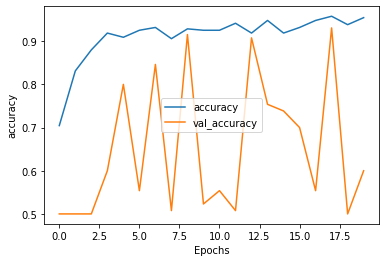

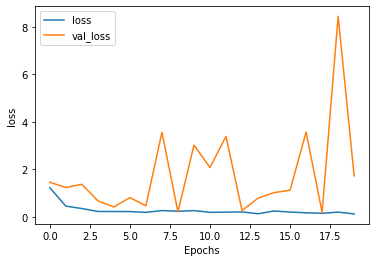

In [53]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

Adding BatchNormalization layer is not helpful

#Increasing epochs to see if it increases accuracy and validatation accuracy

In [110]:
model = Sequential([
                    Conv2D(filters = 512, kernel_size = (3, 3), activation = 'relu', input_shape = (64, 64, 3)),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    Conv2D(filters = 256, kernel_size = (3, 3), activation = 'relu'),
                    MaxPooling2D(pool_size=(2, 2), strides=None, padding="valid"),
                    Dropout(0.1),
                    Flatten(),
                    Dense(1, activation = 'sigmoid')                 
                    ])
model.compile(optimizer = 'adam', loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [111]:
history = model.fit(train_generator, validation_data = validation_generator, epochs = 30)

Epoch 1/30
39/39 [==============================] - 9s 224ms/step - loss: 0.7088 - accuracy: 0.5682 - val_loss: 0.6583 - val_accuracy: 0.6077
Epoch 2/30
39/39 [==============================] - 8s 215ms/step - loss: 0.5513 - accuracy: 0.7370 - val_loss: 0.5730 - val_accuracy: 0.7538
Epoch 3/30
39/39 [==============================] - 9s 218ms/step - loss: 0.4679 - accuracy: 0.8117 - val_loss: 0.6099 - val_accuracy: 0.7154
Epoch 4/30
39/39 [==============================] - 8s 217ms/step - loss: 0.4161 - accuracy: 0.8247 - val_loss: 0.4865 - val_accuracy: 0.7538
Epoch 5/30
39/39 [==============================] - 8s 216ms/step - loss: 0.3171 - accuracy: 0.8864 - val_loss: 0.6519 - val_accuracy: 0.6769
Epoch 6/30
39/39 [==============================] - 9s 219ms/step - loss: 0.3250 - accuracy: 0.8442 - val_loss: 0.3457 - val_accuracy: 0.8615
Epoch 7/30
39/39 [==============================] - 8s 216ms/step - loss: 0.3278 - accuracy: 0.8799 - val_loss: 0.3302 - val_accuracy: 0.8538
Epoch 

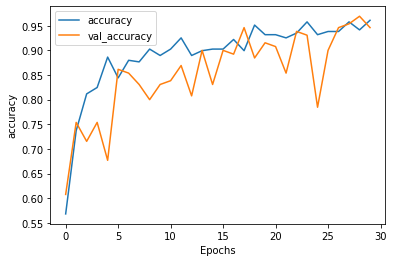

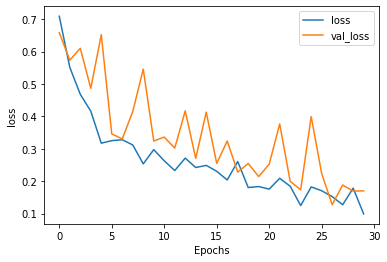

In [112]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")